In [ ]:
# %load test
# import os
# os.environ['CUDA_VISIBLE_DEVICES']='-1'

# 可能有报错matplotlib，由于不是专业版无scientific设置，加上代码
'''
import matplotlib
matplotlib.use('TKAgg)'
import matplotlib.pyplot as plt
'''
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from inputps import YtoZS, cacul
from net import IANN

weights_path_new = 'weights/model-ep522-valoss0.033'
weights_path_old = 'weights/model-ep047-valoss0.028'
freq = np.linspace(5*1e8,1.5*1e9,501)



musi = np.loadtxt('./datas/input/6pk_log.npymusi.csv')
mu = musi[:6]
sigma = musi[6:]

label_path = 'G:/Zheng_caizhi/Pycharmprojects/SAW_tf/datas/out/6p1k_2.csvmaxmin.csv'
label_mm = np.genfromtxt(label_path, delimiter=',')
label_max = label_mm[0]
label_min = label_mm[1]
label_path1 = 'G:/Zheng_caizhi/Pycharmprojects/SAW_tf/datas/out/6p1k_2.csv'
label = np.genfromtxt(label_path1, delimiter=',')

model_n = IANN()
model_o = IANN()
model_n.load_weights(weights_path_new)
model_o.load_weights(weights_path_old)

vali = True
test = False




In [ ]:
vali = True
test = False

In [ ]:
test_result_n[33]

In [ ]:
label[33]

In [35]:
print(abs((test_result_n[33] - label[33]) / label[33])*100)

[2.18470449e-01 3.96999208e-01 6.72805054e-04 7.37629414e+00
 8.45546843e-01 2.91037735e+00 2.72208516e-02]


5/5 [==============================] - 0s 26ms/step
0


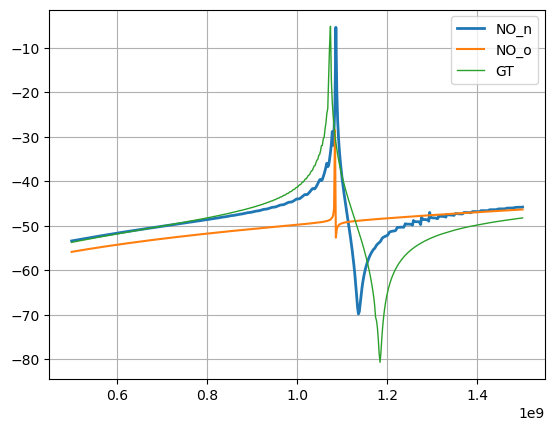

1


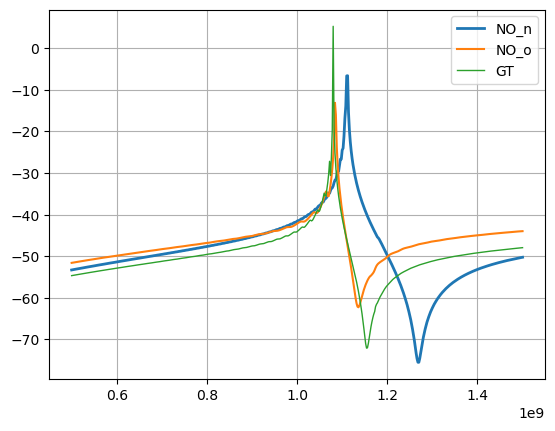

2


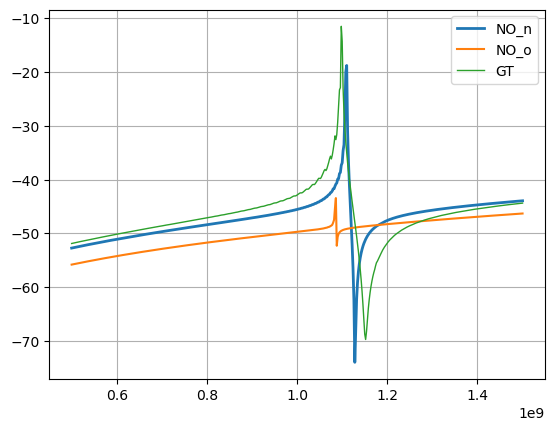

3


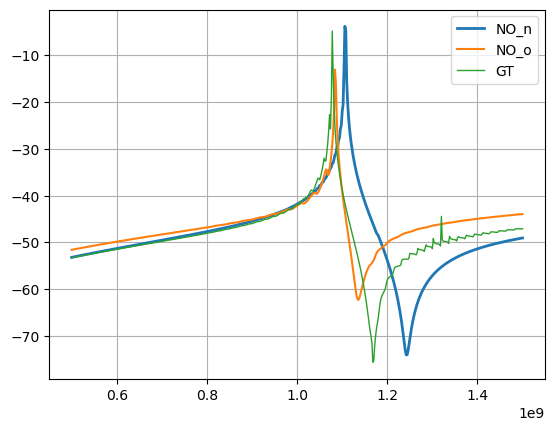

4


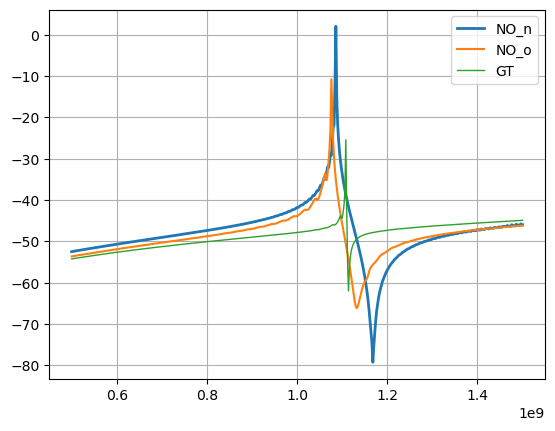

5


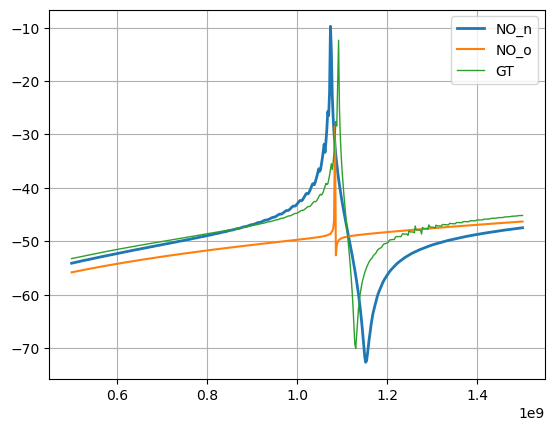

6


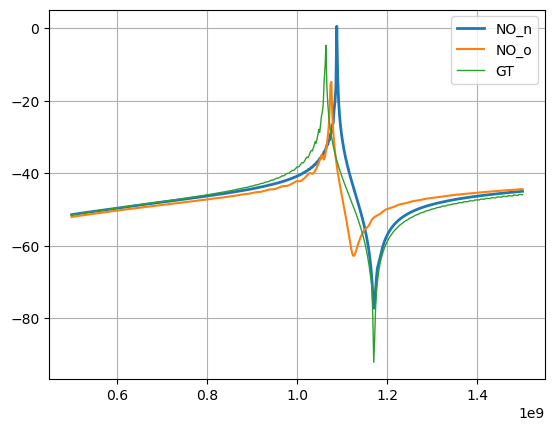

7


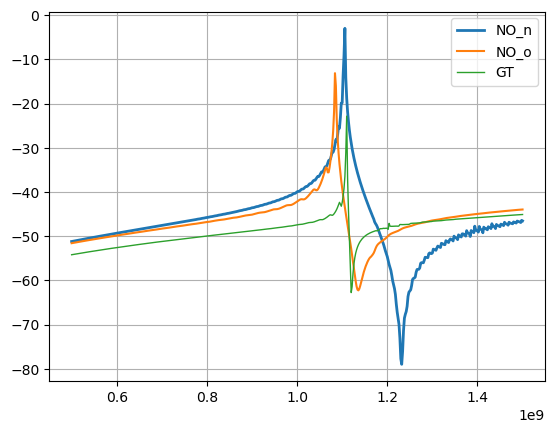

8


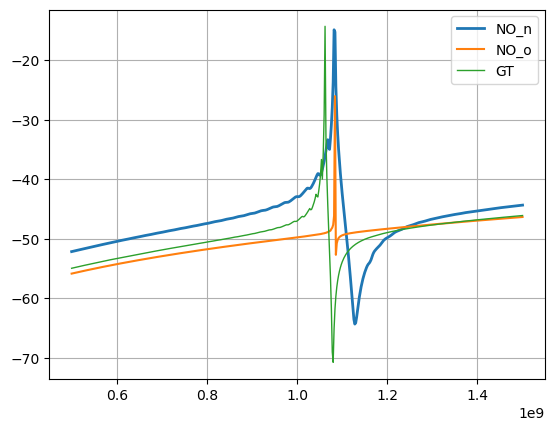

9


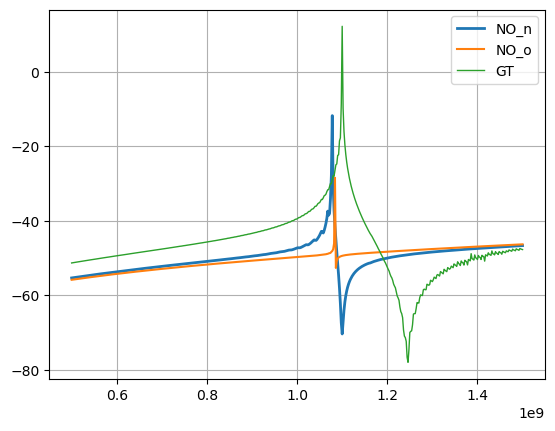

10


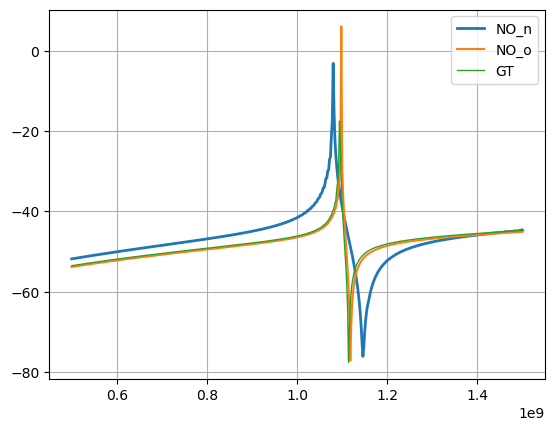

11


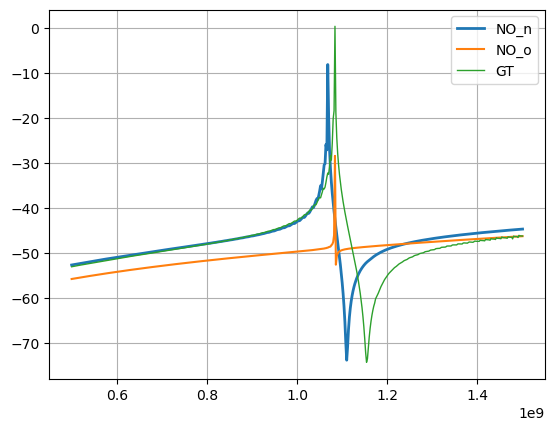

12


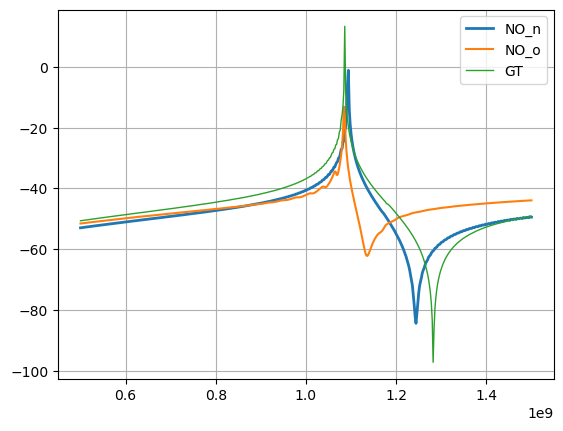

13


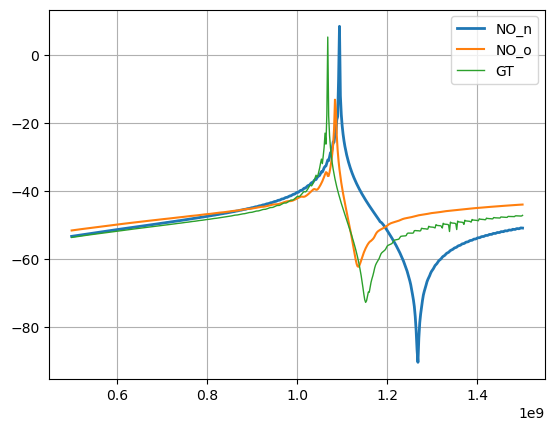

14


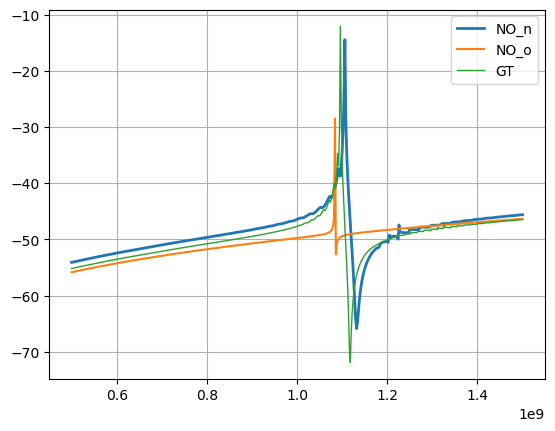

15


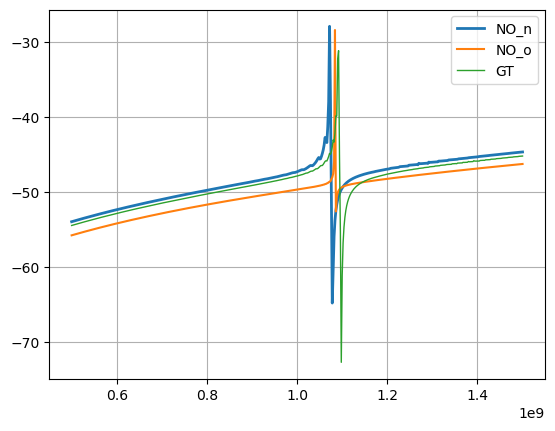

16


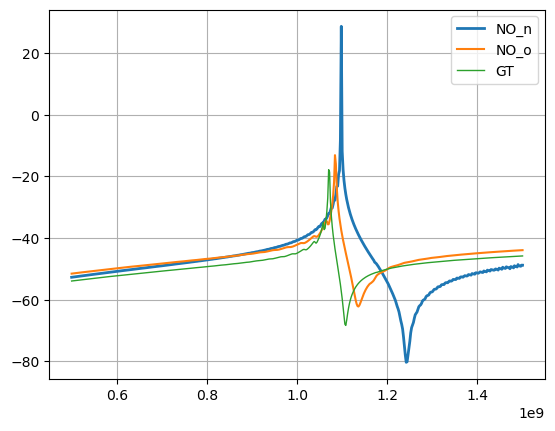

17


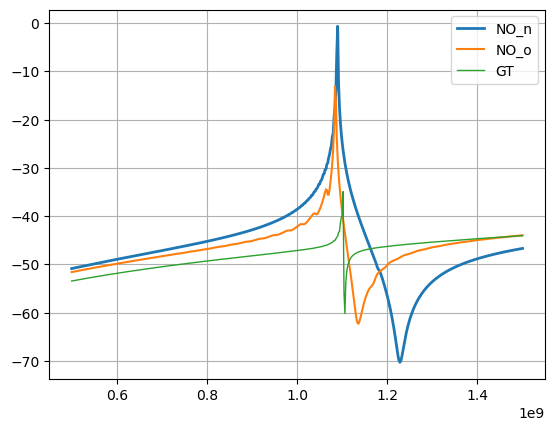

18


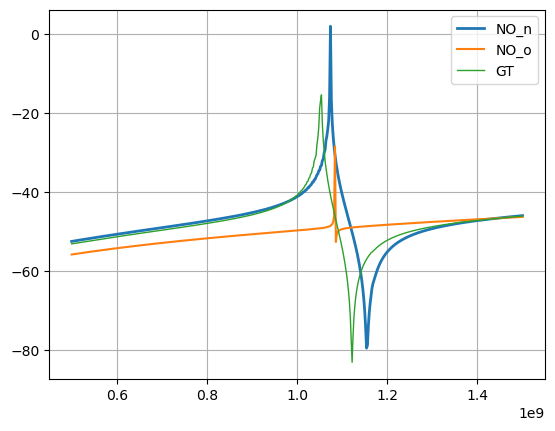

19


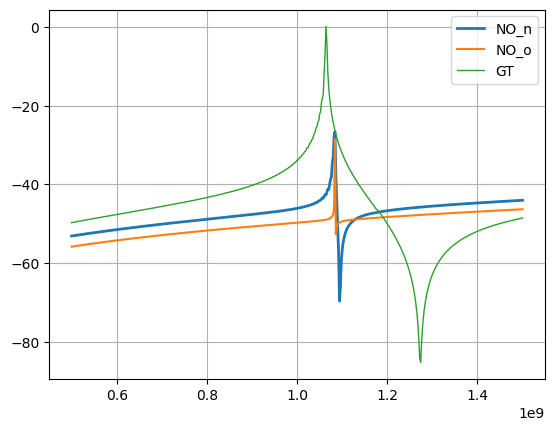

20


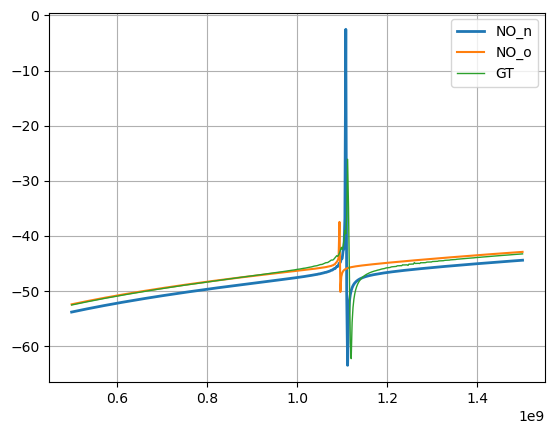

21


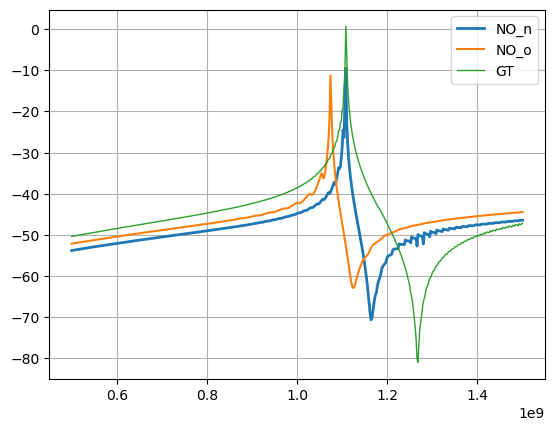

22


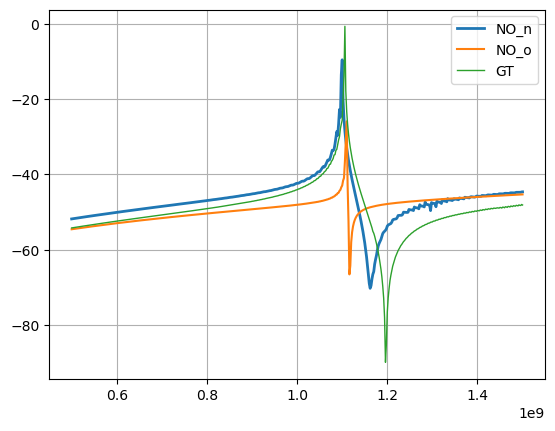

23


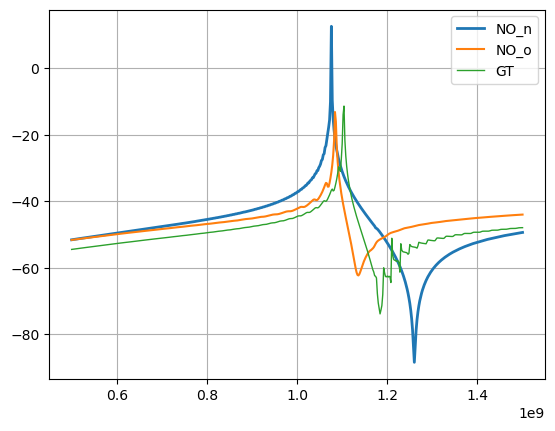

24


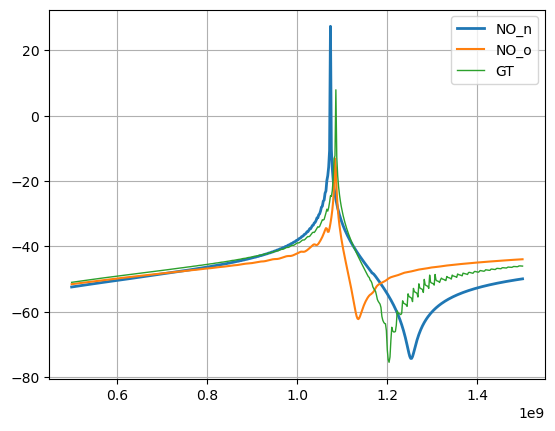

25


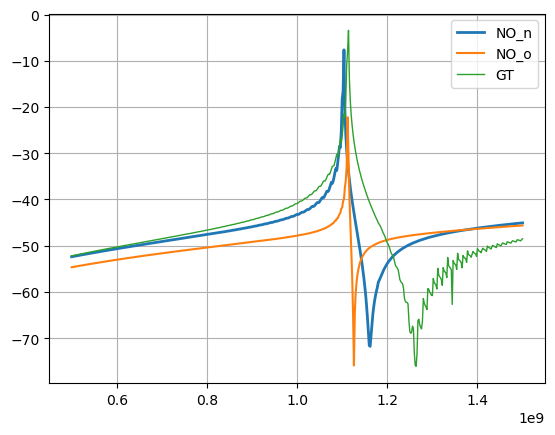

26


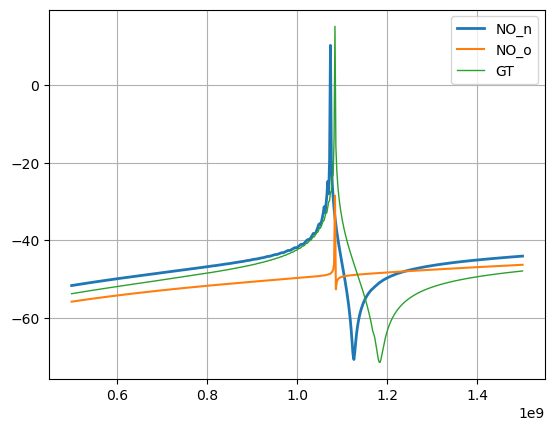

27


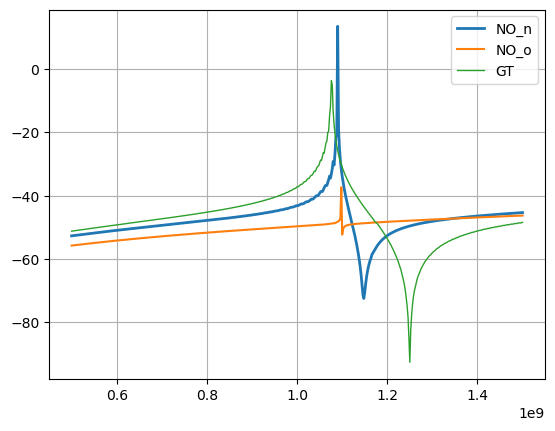

28


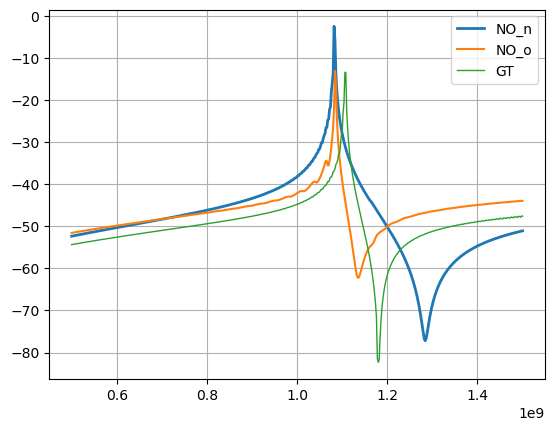

29


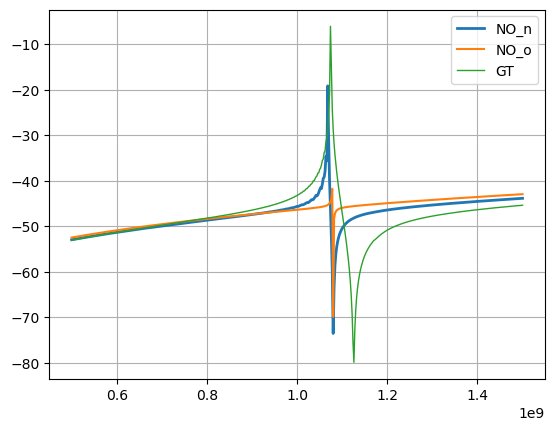

30


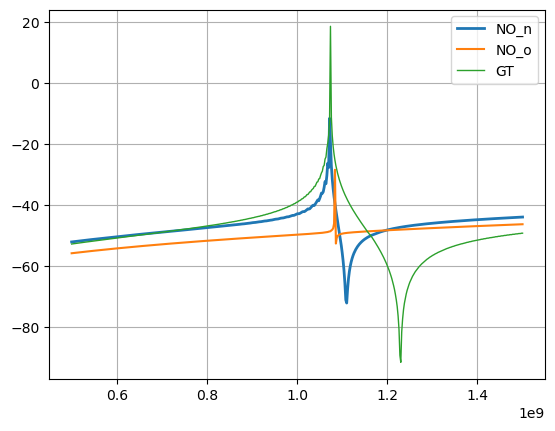

31


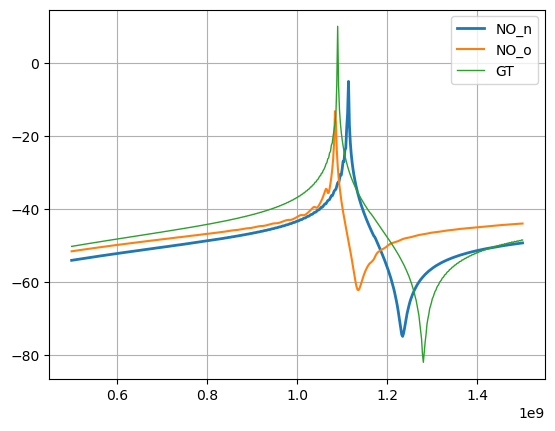

32


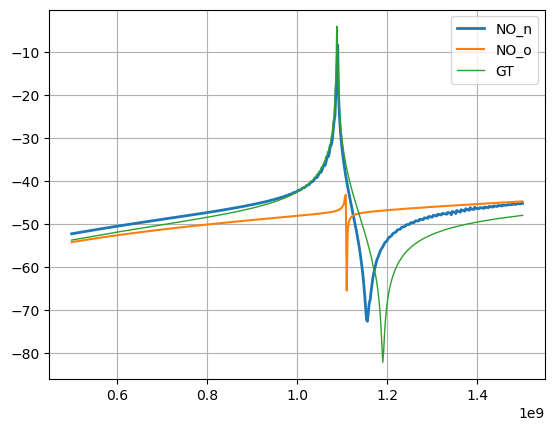

33


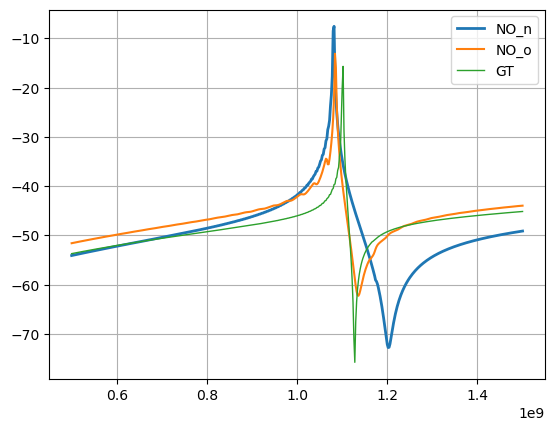

34


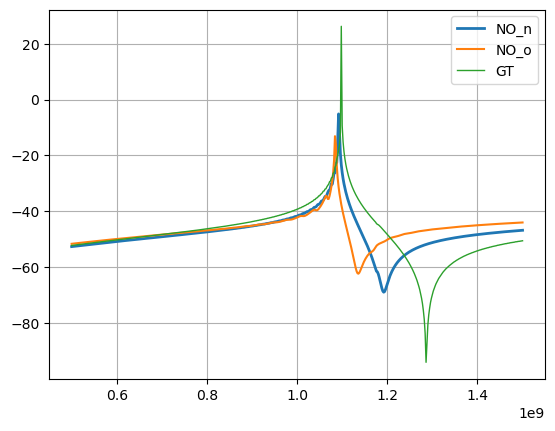

35


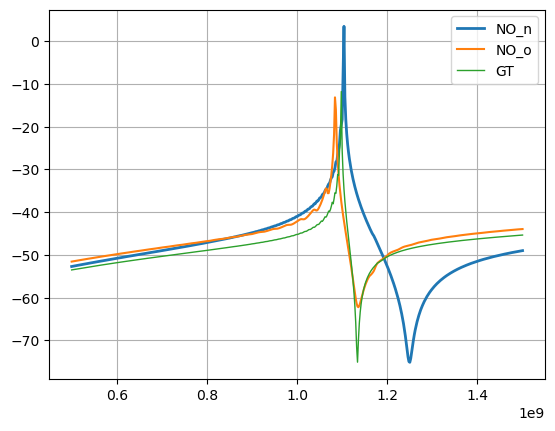

36


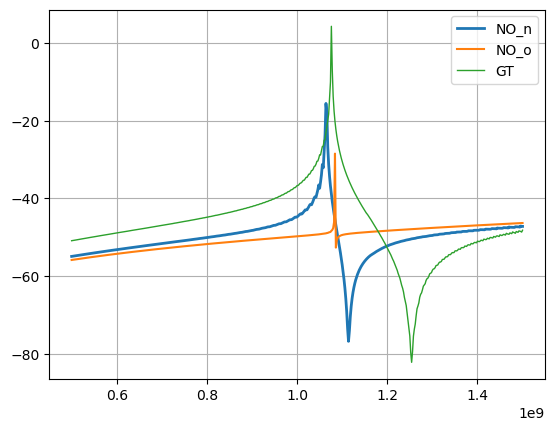

37


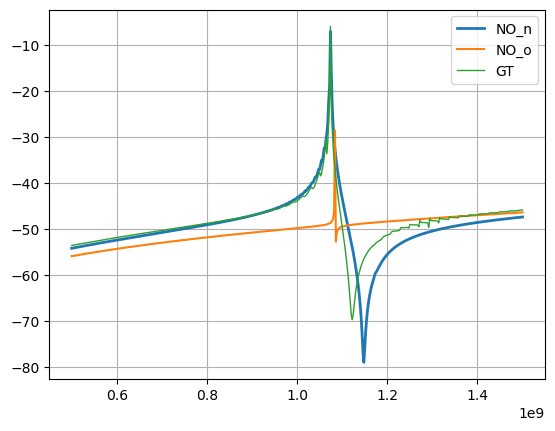

38


KeyboardInterrupt: 

In [36]:
# vali = False
# test = True
if vali:
    data_path = 'G:/Zheng_caizhi/Pycharmprojects/SAW_tf/datas/input/vali600_logn.npy'
    data = np.load(data_path)
    test_set = tf.data.Dataset.from_tensor_slices(data).batch(128)
    test_result_n = model_n.predict(test_set)
    test_result_n = (test_result_n*(label_max - label_min)) + label_min
    test_result_o = model_o.predict(test_set)
    test_result_o = (test_result_o*(label_max - label_min)) + label_min

    plt.ion()
    for i in range(0,500):
        y_dl_n = cacul(test_result_n[i])
        y_dl_o = cacul(test_result_o[i])
        tt = cacul(label[i])
        print(i)
        plt.clf()
        # plt.ion()
        plt.plot(freq, 20*np.log10(abs((y_dl_n))), linewidth=2,label='NO_n')
        plt.plot(freq, 20*np.log10(abs((y_dl_o))), label='NO_o')
        plt.plot(freq, 20*np.log10(abs((tt))),linewidth=1, label='GT')
        # plt.yscale('log')
        plt.legend()
        plt.grid('on')

        plt.pause(2)
        if i==500:
            plt.ioff()
        plt.show(block=False)

        # plt.close()
# data = data * sigma + mu

if test:
    plt.ion()
    for i in range(19,101):
        test_set = np.loadtxt('./datas/h-0.01-0.01-1.csv',delimiter=',')
        tt = test_set[:, i:i+2]
        tt = np.vectorize(complex)(tt[:,0],tt[:,1])
        tt6 = np.array(YtoZS(tt,freq)).T
        test_su = (tt6 - mu) / sigma
        test_set = tf.data.Dataset.from_tensors(test_su).batch(1)
        test_result_n = model_n.predict(test_set)
        test_result_n = (test_result_n[0]*(label_max - label_min)) + label_min
        test_result_o = model_o.predict(test_set)
        test_result_o = (test_result_o[0]*(label_max - label_min)) + label_min
# print(test_result_n.shape)
# for i in range(0,101):
    # test_result_n = [4.02850237e+01,3.77054896e+02,1.45512831e+02,5.74451271e-02,2.11223737e+00,1.14177241e-03,4.20560322e+03]
    # y_dl = cacul(test_result_n[i,:])
        y_dl_n = cacul(test_result_n)
        y_dl_o = cacul(test_result_o)
        # tt = cacul(label[i,:])
        plt.plot(freq, 20*np.log10(abs((y_dl_n))), label='NO_n')
        plt.plot(freq, 20*np.log10(abs((y_dl_o))), label='NO_o')
        plt.plot(freq, 20*np.log10(abs((tt))), label='GT')
        # plt.yscale('log')
        plt.legend()
        plt.show()
        plt.grid('on')
        plt.pause(2)
        # if i==500:
        #     plt.ioff()
        plt.show(block=False)

In [ ]:
plt.plot(freq, 20*np.log10(abs((y_dl_n))), linewidth=2,label='NO_n')
plt.plot(freq, 20*np.log10(abs((y_dl_o))), label='NO_o')
plt.plot(freq, 20*np.log10(abs((tt))),linewidth=1, label='GT')

In [ ]:
plt.plot(freq,(np.log10(y_dl_n)).real)
plt.plot(freq,(np.log10(y_dl_n)).imag)
# plt.plot((np.log10(y_dl_n)).real,(np.log10(y_dl_n)).imag)
# plt.plot(freq,abs(y_dl_n))
# np.log()
# plt.yscale('log')

In [ ]:
np.argmax(abs(y_dl_n))

In [ ]:
np.argmin(abs(np.log10(y_dl_n)))

In [ ]:
import numpy as np
nn = np.load('./datas/input/6pk_log.npy')

In [ ]:
nn[:,:,5]

In [ ]:
import tensorflow.keras.layers as ly
import numpy as np
x = np.random.rand(50,1,1)
y = ly.GlobalAveragePooling1D()(x)

In [1]:
import numpy as np
n1 = 100
n1_num = [i for i in np.linspace(n1 * (1-0.99), n1 * (1), 100)]

In [5]:
n1_num = [i for i in range(1,101)]

In [6]:
n1_num

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]